# Coding Class 1: Artificial neural network

## This block imports necessary libraries and modules:

#### numpy for numerical operations, train_test_split from sklearn.model_selection for dataset splitting, load_iris from sklearn.datasets to load the Iris dataset, Sequential from keras.models to create a sequential model, Dense from keras.layers to create fully connected layers, and matplotlib.pyplot for plotting.

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


## This block loads the Iris dataset

In [10]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

#### The Iris dataset using the load_iris function from sklearn.datasets. It assigns the input features to X and the corresponding labels to y.

## This block performs dataset split

In [11]:
# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

##### This code will print the number of data points for each dataset. The shape[0] attribute returns the number of rows in the array, which represents the number of data points in this case.

In [12]:
print("Number of data points:") 
print("X_train:", X_train.shape[0]) 
print("X_temp:", X_temp.shape[0]) 
print("X_val:", X_val.shape[0]) 
print("X_test:", X_test.shape[0])

Number of data points:
X_train: 105
X_temp: 45
X_val: 22
X_test: 23


#### In this line, the train_test_split function is called again, but this time on X_temp and y_temp, which are the data and labels that remained after the first split. This second split further divides the remaining data into two parts: X_val and X_test for the input data, and y_val and y_test for the labels. The test_size=0.5 parameter indicates that 50% of the remaining data will be allocated for testing, and the other 50% will be used for validation. To summarize, the initial dataset is split into three parts: 70% for training, 15% for validation, and 15% for testing. This is a common approach in machine learning to evaluate the model's performance on unseen data during the testing phase and tune the model's hyperparameters using the validation set.

#### Note: temp used here (X_temp and y_temp) are temporary variables that hold the remaining data and labels after the initial split. The purpose of these temporary variables is to further split the data into a validation set (X_val and y_val) and testing set (X_test and y_test).

## This block creates the neural network model.

In [13]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=X_train.shape[1]))  # Hidden layer with 10 units
model.add(Dense(units=3, activation='softmax'))  # Output layer with 3 units (multiclass classification)


#### The neural network model is created using Sequential from keras.models. The model is initialized with no layers (Sequential()). The add method is then used to add layers to the model. The first added layer is a dense (fully connected) layer with 10 units and ReLU activation function. The input_dim is set to the number of features in the input data. The second added layer is the output layer with 3 units (corresponding to the three Iris species) and softmax activation for multiclass classification.

## This block compiles the model

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#### This line compiles the model by specifying the loss function (sparse_categorical_crossentropy), optimizer (adam), and evaluation metric (accuracy). The loss function is suitable for multiclass classification tasks.

## This block trains the model

In [15]:

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1)


Train on 105 samples, validate on 22 samples
Epoch 1/10
105/105 [==============================] - 1s 11ms/step - loss: 1.3630 - accuracy: 0.5333 - val_loss: 1.2823 - val_accuracy: 0.5455
Epoch 2/10
105/105 [==============================] - 0s 210us/step - loss: 1.3072 - accuracy: 0.5429 - val_loss: 1.2544 - val_accuracy: 0.5455
Epoch 3/10
105/105 [==============================] - 0s 157us/step - loss: 1.2660 - accuracy: 0.5524 - val_loss: 1.2309 - val_accuracy: 0.5455
Epoch 4/10
105/105 [==============================] - 0s 157us/step - loss: 1.2267 - accuracy: 0.5429 - val_loss: 1.2124 - val_accuracy: 0.5455
Epoch 5/10
105/105 [==============================] - 0s 180us/step - loss: 1.1947 - accuracy: 0.5429 - val_loss: 1.1954 - val_accuracy: 0.5455
Epoch 6/10
105/105 [==============================] - 0s 182us/step - loss: 1.1717 - accuracy: 0.5333 - val_loss: 1.1835 - val_accuracy: 0.5000
Epoch 7/10
105/105 [==============================] - 0s 1ms/step - loss: 1.1510 - accuracy

#### This line trains the model using the fit method. It specifies the training data (X_train and y_train), the number of epochs (10), batch size (32), and verbose=1 to display the progress during training. The training history is stored in the history variable.

## This block plots the training and testing accuracy graphs

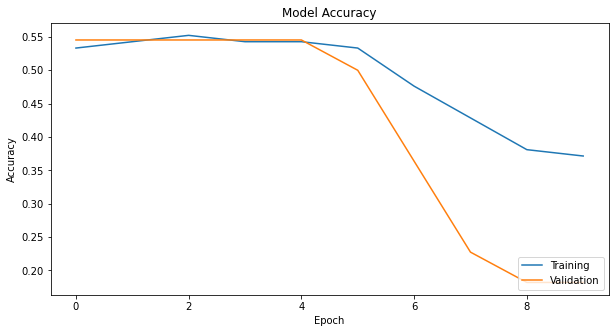

In [16]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()



#### This explains the plots of the training and testing accuracy over epochs using matplotlib.pyplot. It creates a figure with a specified size, plots the training accuracy from history.history['accuracy'], plots the testing accuracy from history.history['val_accuracy'], adds a title and labels to the plot, adds a legend, and displays the plot.

## This block plots the training and testing loss graphs

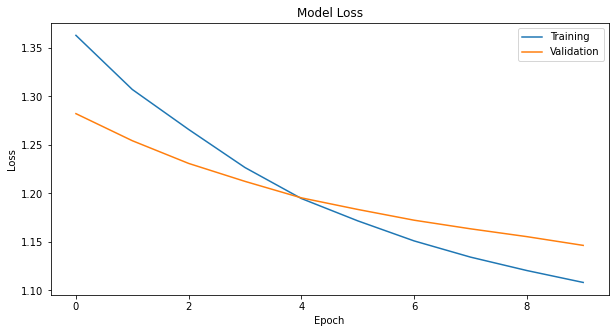

In [17]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

#### This explains the plots of the training and testing loss over epochs using matplotlib.pyplot. It creates a figure with a specified size, plots the training loss from history.history['loss'], plots the testing loss from history.history['val_loss'], adds a title and labels to the plot, adds a legend, and displays the plot.

## This block evaluate the trained model

In [18]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

23/23 [==============================] - 0s 242us/step
Test Loss: 1.081186294555664
Test Accuracy: 0.47826087474823


#### These lines evaluate the trained model on the testing set using the evaluate method. It computes and stores the test loss and accuracy in the loss and accuracy variables, respectively. The values are then printed.

In [19]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

## This block computes the confusion matrix

In [20]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred_labels)
classification_report = classification_report(y_test, y_pred_labels)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report)

Confusion Matrix:
[[ 1  0  5]
 [ 0 10  0]
 [ 0  7  0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.59      1.00      0.74        10
           2       0.00      0.00      0.00         7

    accuracy                           0.48        23
   macro avg       0.53      0.39      0.34        23
weighted avg       0.52      0.48      0.40        23



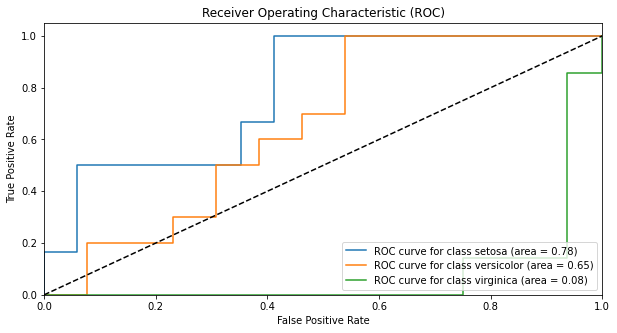

In [21]:
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(data.target_names)):
    y_test_binary = np.where(y_test == i, 1, 0)
    y_pred_binary = y_pred[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, y_pred_binary)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 5))
for i in range(len(data.target_names)):
    plt.plot(fpr[i], tpr[i], label='ROC curve for class %s (area = %0.2f)' % (data.target_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

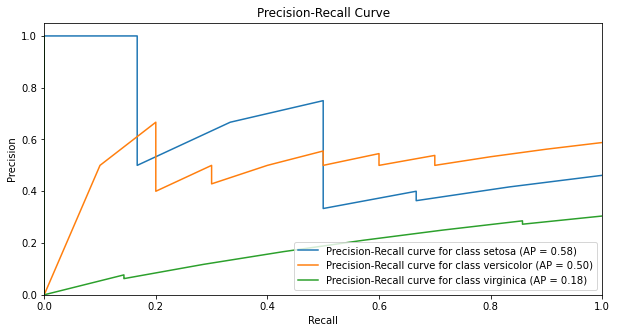

In [22]:
# Compute precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(data.target_names)):
    y_test_binary = np.where(y_test == i, 1, 0)
    y_pred_binary = y_pred[:, i]
    precision[i], recall[i], _ = precision_recall_curve(y_test_binary, y_pred_binary)
    average_precision[i] = auc(recall[i], precision[i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 5))
for i in range(len(data.target_names)):
    plt.plot(recall[i], precision[i], label='Precision-Recall curve for class %s (AP = %0.2f)' % (data.target_names[i], average_precision[i]))
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [23]:
# Compute confusion matrix, sensitivity, and specificity for each class
sensitivity = dict()
specificity = dict()
for i in range(len(data.target_names)):
    y_test_binary = np.where(y_test == i, 1, 0)
    y_pred_binary = np.where(y_pred_labels == i, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()
    sensitivity[i] = tp / (tp + fn)
    specificity[i] = tn / (tn + fp)

# Print sensitivity and specificity for each class
for i in range(len(data.target_names)):
    print("Class", data.target_names[i])
    print("Sensitivity:", sensitivity[i])
    print("Specificity:", specificity[i])
    print()

Class setosa
Sensitivity: 0.16666666666666666
Specificity: 1.0

Class versicolor
Sensitivity: 1.0
Specificity: 0.46153846153846156

Class virginica
Sensitivity: 0.0
Specificity: 0.6875



In [24]:
from sklearn.metrics import f1_score

# Compute F1 score for each class
f1_scores = {}
for i in range(len(data.target_names)):
    f1_scores[data.target_names[i]] = f1_score(y_test == i, y_pred_labels == i)

# Print F1 score for each class
for class_name, f1 in f1_scores.items():
    print("Class:", class_name)
    print("F1 Score:", f1)
    print()


Class: setosa
F1 Score: 0.2857142857142857

Class: versicolor
F1 Score: 0.7407407407407407

Class: virginica
F1 Score: 0.0



In [25]:
# Compute sensitivity and specificity
true_positive = np.diag(confusion)
false_positive = np.sum(confusion, axis=0) - true_positive
false_negative = np.sum(confusion, axis=1) - true_positive
true_negative = np.sum(confusion) - (true_positive + false_positive + false_negative)
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

In [26]:
# Compute precision for each class
precision_per_class = true_positive / (true_positive + false_positive)

In [27]:
# Print evaluation metrics
print("Confusion Matrix:")
print(confusion)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("Precision per class:", precision_per_class)

Confusion Matrix:
[[ 1  0  5]
 [ 0 10  0]
 [ 0  7  0]]
Sensitivity: [0.16666667 1.         0.        ]
Specificity: [1.         0.46153846 0.6875    ]
F1 Score: <function f1_score at 0x000001D263D93DC8>
Precision per class: [1.         0.58823529 0.        ]


## <font color=red>Assignment</font>
#### <font color=red>Improve the ANN model by modifying the hyperparameters such as adding more layer, units, changing the optimizer (try sgd, rmsprop, or adadelta), etc</font>
#### <font color=green>Deadline: Before the next class (22nd of June, 2023)</font>